## Data analysis

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Loading the dataset from uci ml repository
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets    #hi 

### Metadata

In [136]:
# metadata
print(adult.metadata)
feature_names = X.columns
print(feature_names)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

### Get numerical and categorical columns

In [137]:
numerical = list(X.select_dtypes(include='number').columns)
categorial = list(set(X.columns[1:])-set(numerical))
numerical, categorial

(['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'],
 ['occupation',
  'education',
  'race',
  'marital-status',
  'workclass',
  'relationship',
  'native-country',
  'sex'])

### Convert categorical columns to categorical

In [138]:
for column in categorial:
    print(column)
    X[column]= X[column].astype('category')

occupation
education
race
marital-status
workclass
relationship
native-country
sex


/tmp/ipykernel_9117/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]= X[column].astype('category')
/tmp/ipykernel_9117/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]= X[column].astype('category')
/tmp/ipykernel_9117/2749402504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [139]:
X.select_dtypes(include='category').describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,47879,48842,48842,47876,48842,48842,48842,48568
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [140]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [141]:
y['income']=y['income'].apply(lambda s : s.replace('.', ''))
y['income']=y['income'].astype('category')
y['income']=y['income'].cat.codes

/tmp/ipykernel_9117/2481787065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].apply(lambda s : s.replace('.', ''))
/tmp/ipykernel_9117/2481787065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].astype('category')
/tmp/ipykernel_9117/2481787065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [142]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [143]:
X.join(y)[['relationship', 'income']].value_counts()

relationship    income
Not-in-family   0         11307
Husband         0         10870
                1          8846
Own-child       0          7470
Unmarried       0          4816
Other-relative  0          1454
Not-in-family   1          1276
Wife            0          1238
                1          1093
Unmarried       1           309
Own-child       1           111
Other-relative  1            52
Name: count, dtype: int64

In [144]:
X.join(y).query('relationship == "Own-child"')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,0
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48817,23,Private,93977,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,0
48824,22,Private,269623,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0
48834,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


## Data splits

In [145]:
seed=42

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## SOTA(?) Methods

### XGBoost

In [147]:
import xgboost as xgb

In [148]:
xgb_model = xgb.XGBClassifier(enable_categorical=True)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [149]:
xgb_model.predict_proba(X_test)[:,1].shape

(9769,)

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

def eval(model, X_test=X_test, y_test=y_test):
    pred = model.predict(X_test)
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, pred)
    metrics['precision'] = precision_score(y_test, pred)
    metrics['recall'] = recall_score(y_test, pred)
    metrics['f1'] = f1_score(y_test, pred)

    metrics['roc_curve'] = RocCurveDisplay.from_estimator(model, X_test, y_test)
    metrics['prc'] = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

    return metrics

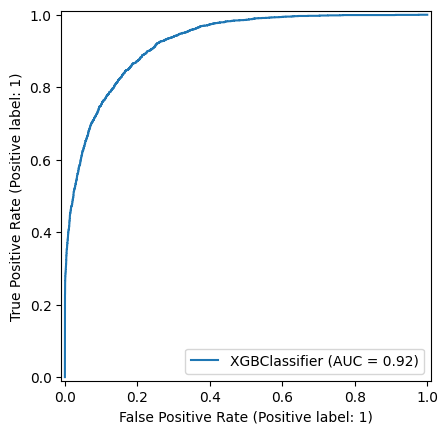

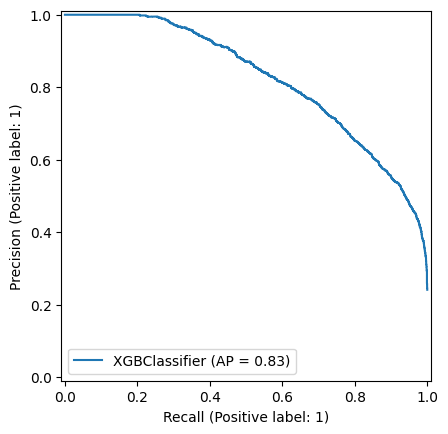

In [151]:
metrics=eval(xgb_model)

In [152]:
metrics

{'accuracy': 0.8722489507626164,
 'precision': 0.7808219178082192,
 'recall': 0.6535031847133758,
 'f1': 0.7115117891816921,
 'roc_curve': <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x77a272839400>,
 'prc': <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x77a21455f3e0>}

{'accuracy': 0.9048447777237478,
 'precision': 0.848176631108906,
 'recall': 0.7327475353621946,
 'f1': 0.7862481315396114,
 'roc_curve': <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x77a1a72a52b0>,
 'prc': <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x77a1a7e30500>}

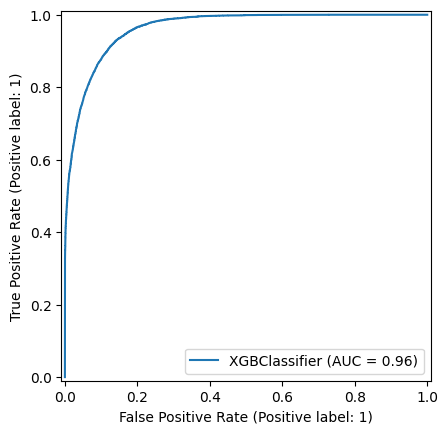

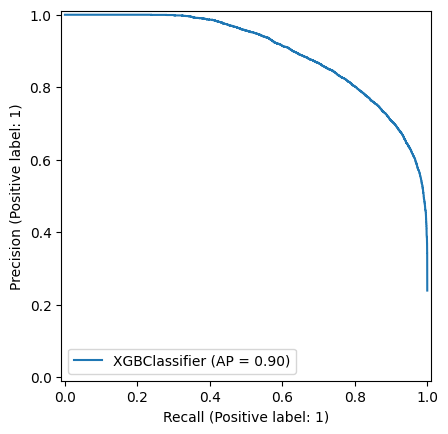

In [153]:
eval(xgb_model, X_train, y_train)

In [154]:
# Get the detailed dump of the tree, including statistics
tree_dump = xgb_model.get_booster().get_dump(dump_format='text', with_stats=True)

# Print the tree dump to see the detailed information, including gain for each node
for tree in tree_dump:
    print(tree)

0:[relationship:{1,2,3,4}] yes=2,no=1,missing=1,gain=7609.99463,cover=7522.36572
	1:[education:{0,1,2,3,4,5,6,8,11,13,15}] yes=4,no=3,missing=3,gain=2855.79492,cover=3397.02979
		3:[capital-gain<5060] yes=7,no=8,missing=8,gain=441.419434,cover=1131.44482
			7:[occupation:{0,1,2,3,5,6,7,8,9,14}] yes=16,no=15,missing=16,gain=348.476318,cover=966.454468
				15:[capital-loss<1741] yes=25,no=26,missing=26,gain=147.626953,cover=767.580505
					25:[age<28] yes=43,no=44,missing=44,gain=98.9907227,cover=682.293762
						43:leaf=0.103307396,cover=28.6856003
						44:leaf=0.67663908,cover=653.608154
					26:[capital-loss<1980] yes=45,no=46,missing=46,gain=8.1697998,cover=85.2867203
						45:leaf=1.13251007,cover=70.8476562
						46:leaf=0.747735441,cover=14.4390612
				16:[capital-loss<1741] yes=27,no=28,missing=28,gain=56.7075958,cover=198.873993
					27:[occupation:{2,4,5,6,7,8,9,10,11,12,13,14}] yes=48,no=47,missing=47,gain=40.9127579,cover=189.247955
						47:leaf=0.310339212,cover=128.218857

[0]	validation_0-logloss:0.44761
[1]	validation_0-logloss:0.39532
[2]	validation_0-logloss:0.36247
[3]	validation_0-logloss:0.34046
[4]	validation_0-logloss:0.32500
[5]	validation_0-logloss:0.31466
[6]	validation_0-logloss:0.30527
[7]	validation_0-logloss:0.29987
[8]	validation_0-logloss:0.29610
[9]	validation_0-logloss:0.29270
[10]	validation_0-logloss:0.29030
[11]	validation_0-logloss:0.28856
[12]	validation_0-logloss:0.28626
[13]	validation_0-logloss:0.28471
[14]	validation_0-logloss:0.28232
[15]	validation_0-logloss:0.28116
[16]	validation_0-logloss:0.28019
[17]	validation_0-logloss:0.27856
[18]	validation_0-logloss:0.27838
[19]	validation_0-logloss:0.27794
[20]	validation_0-logloss:0.27676
[21]	validation_0-logloss:0.27623
[22]	validation_0-logloss:0.27603
[23]	validation_0-logloss:0.27607
[24]	validation_0-logloss:0.27561
[25]	validation_0-logloss:0.27488
[26]	validation_0-logloss:0.27523
[27]	validation_0-logloss:0.27437
[28]	validation_0-logloss:0.27419
[29]	validation_0-loglos

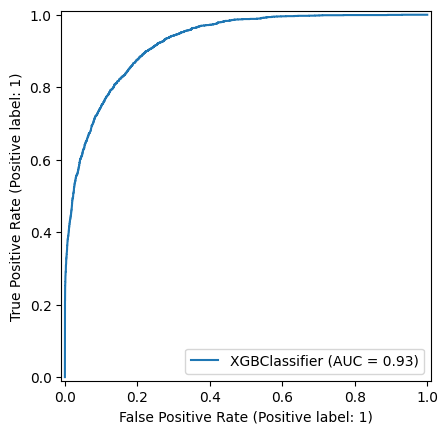

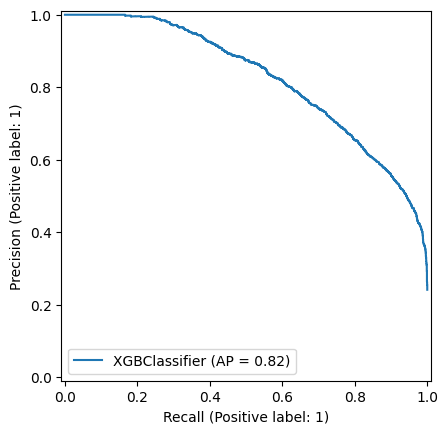

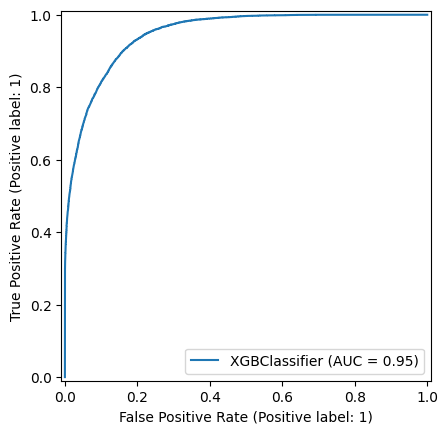

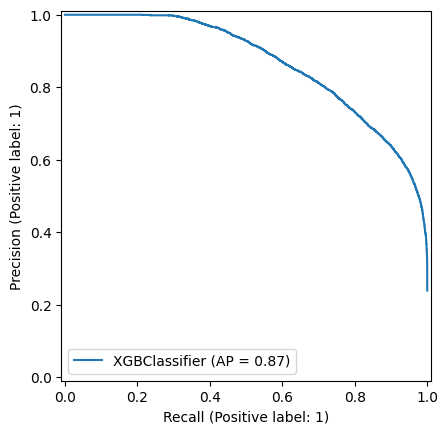

In [155]:
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.05)
rx=xgb.XGBClassifier(enable_categorical = True, early_stopping_rounds=5)
rx.fit(X_train_small, y_train_small, eval_set=[(X_val, y_val)])
print(eval(rx))
print(eval(rx,X_train_small, y_train_small))

### LightGBM

In [156]:
import lightgbm
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

/home/xing/miniconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/xing/miniconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 9332, number of negative: 29741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 725
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238835 -> initscore=-1.159077
[LightGBM] [Info] Start training from score -1.159077


LGBMClassifier()

{'accuracy': 0.8731702323676938,
 'precision': 0.7870370370370371,
 'recall': 0.6496815286624203,
 'f1': 0.7117934403349616,
 'roc_curve': <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x77a1a7facce0>,
 'prc': <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x77a1a7d5bb00>}

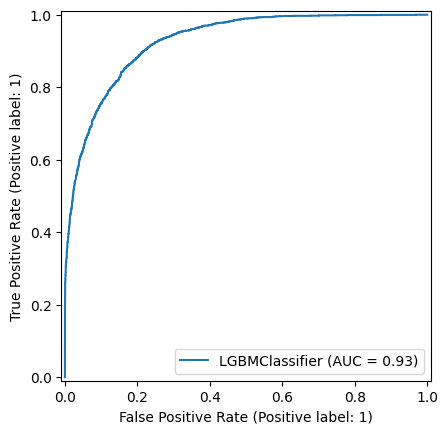

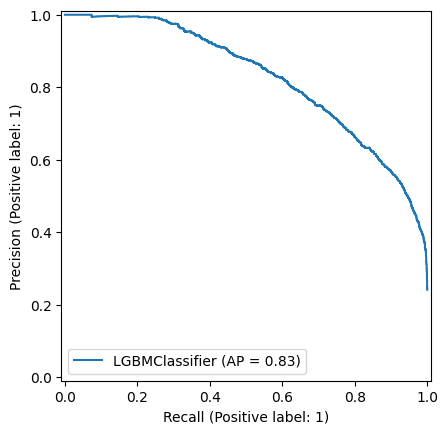

In [157]:
metrics=eval(lgbm_model)
metrics

{'accuracy': 0.8866736621196223,
 'precision': 0.8129147524247065,
 'recall': 0.6825975139305616,
 'f1': 0.7420782851817335,
 'roc_curve': <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x77a1a7e30aa0>,
 'prc': <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay at 0x77a1a7eca1e0>}

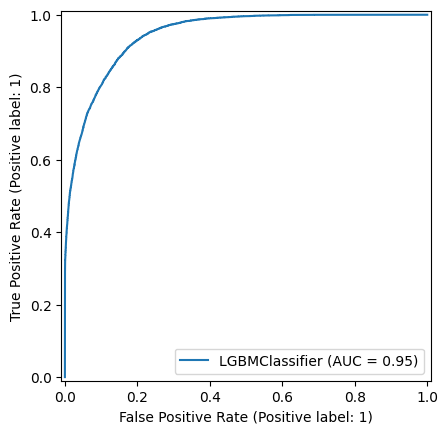

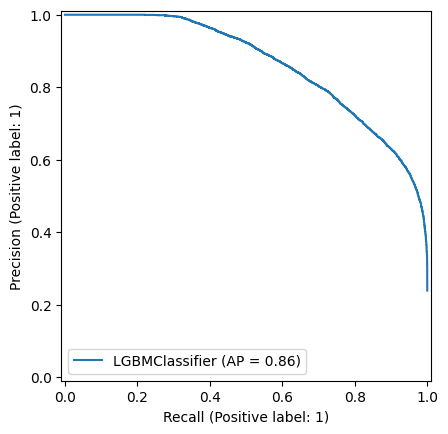

In [158]:
eval(lgbm_model, X_train, y_train)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

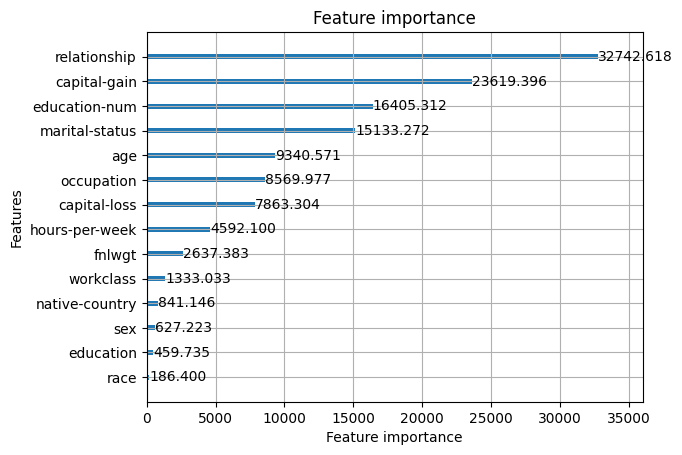

In [159]:
lightgbm.plot_importance(lgbm_model, importance_type='gain')

### Standardize numerical features

I'll need to do this for neural methods.

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical]=scaler.fit_transform(X_train[numerical])
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
37193,-0.482809,Private,-1.315975,HS-grad,-0.420108,Married-civ-spouse,Transport-moving,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States
31093,0.463496,State-gov,-0.431457,Masters,1.529031,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States
33814,-0.264431,Local-gov,0.587895,12th,-0.809935,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States
14500,1.846557,Private,-1.138576,HS-grad,-0.420108,Divorced,Craft-repair,Unmarried,White,Male,-0.145524,-0.216668,-1.646086,United-States
23399,1.773764,Self-emp-not-inc,-1.525211,HS-grad,-0.420108,Widowed,Sales,Not-in-family,White,Male,-0.145524,-0.216668,2.388283,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.264431,Private,0.095541,Bachelors,1.139203,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,-0.145524,4.467901,0.774535,?
44732,-1.283529,Private,-0.936616,HS-grad,-0.420108,Never-married,Machine-op-inspct,Own-child,White,Female,-0.145524,-0.216668,-0.032339,United-States
38158,-1.137944,Private,1.701503,HS-grad,-0.420108,Divorced,Adm-clerical,Not-in-family,White,Female,-0.145524,-0.216668,-0.032339,United-States
860,-1.501907,Private,0.248322,11th,-1.199763,Never-married,Adm-clerical,Own-child,White,Female,-0.145524,-0.216668,-1.646086,United-States


In [161]:
X_test[numerical] = scaler.transform(X_test[numerical])
X_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7762,-1.501907,Private,2.202051,HS-grad,-0.420108,Never-married,Other-service,Not-in-family,White,Male,-0.145524,-0.216668,-1.646086,United-States
23881,-1.574700,Private,-0.104463,12th,-0.809935,Never-married,Sales,Own-child,White,Female,-0.145524,-0.216668,-1.646086,United-States
30507,-0.992358,Local-gov,1.502379,HS-grad,-0.420108,Never-married,Handlers-cleaners,Other-relative,Black,Male,-0.145524,-0.216668,-0.032339,United-States
28911,-1.356322,Private,0.266570,Some-college,-0.030280,Never-married,Sales,Own-child,White,Female,-0.145524,-0.216668,-0.839212,United-States
19484,0.609081,Private,0.510479,HS-grad,-0.420108,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,-0.145524,-0.216668,1.258660,Puerto-Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,1.264216,Self-emp-not-inc,-0.674677,Masters,1.529031,Separated,Sales,Unmarried,White,Female,-0.145524,-0.216668,-0.355088,United-States
18798,-1.283529,Private,0.149605,HS-grad,-0.420108,Never-married,Other-service,Own-child,White,Male,-0.145524,-0.216668,-0.274401,United-States
29519,-0.046053,Private,0.040607,Some-college,-0.030280,Divorced,Transport-moving,Not-in-family,Black,Male,-0.145524,-0.216668,1.177972,United-States
550,0.536288,Self-emp-not-inc,0.526535,Some-college,-0.030280,Divorced,Exec-managerial,Not-in-family,White,Male,-0.145524,-0.216668,0.774535,United-States


### Neural net

In [162]:
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

data_config = DataConfig(
    target=[
        'income'
    ],  
    continuous_cols=numerical,
    categorical_cols=categorial,
)
trainer_config = TrainerConfig(
)
optimizer_config = OptimizerConfig()
model_config = CategoryEmbeddingModelConfig(
    task="classification",
    metrics=['accuracy', 'precision', 'recall', 'f1_score'],
    metrics_prob_input=[False, False, False, False]
)

In [ ]:
from pytorch_tabular import TabularModel

cat = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

2025-03-18 21:29:14,908 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

In [164]:
train=X_train.join(y_train)
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
37193,-0.482809,Private,-1.315975,HS-grad,-0.420108,Married-civ-spouse,Transport-moving,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States,0
31093,0.463496,State-gov,-0.431457,Masters,1.529031,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States,1
33814,-0.264431,Local-gov,0.587895,12th,-0.809935,Married-civ-spouse,Farming-fishing,Husband,White,Male,-0.145524,-0.216668,-0.032339,United-States,0
14500,1.846557,Private,-1.138576,HS-grad,-0.420108,Divorced,Craft-repair,Unmarried,White,Male,-0.145524,-0.216668,-1.646086,United-States,0
23399,1.773764,Self-emp-not-inc,-1.525211,HS-grad,-0.420108,Widowed,Sales,Not-in-family,White,Male,-0.145524,-0.216668,2.388283,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.264431,Private,0.095541,Bachelors,1.139203,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,-0.145524,4.467901,0.774535,?,1
44732,-1.283529,Private,-0.936616,HS-grad,-0.420108,Never-married,Machine-op-inspct,Own-child,White,Female,-0.145524,-0.216668,-0.032339,United-States,0
38158,-1.137944,Private,1.701503,HS-grad,-0.420108,Divorced,Adm-clerical,Not-in-family,White,Female,-0.145524,-0.216668,-0.032339,United-States,0
860,-1.501907,Private,0.248322,11th,-1.199763,Never-married,Adm-clerical,Own-child,White,Female,-0.145524,-0.216668,-1.646086,United-States,0


In [165]:
cat.fit(train)

Seed set to 42


2025-03-18 21:29:15,046 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-18 21:29:15,100 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:29:15,240 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-18 21:29:15,284 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-18 21:29:15,316 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 18.8 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.4 K │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 20.3 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 20.3 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 24                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2025-03-18 21:30:33,180 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-18 21:30:33,182 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

In [166]:
test=X_test.join(y_test)
cat.evaluate(test)

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8445081114768982     │
│       test_f1_score       │    0.8445081114768982     │
│         test_loss         │    0.32947319746017456    │
│        test_loss_0        │    0.32947319746017456    │
│      test_precision       │    0.8445081114768982     │
│        test_recall        │    0.8445081114768982     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_0': 0.32947319746017456,
  'test_loss': 0.32947319746017456,
  'test_accuracy': 0.8445081114768982,
  'test_precision': 0.8445081114768982,
  'test_recall': 0.8445081114768982,
  'test_f1_score': 0.8445081114768982}]

In [167]:
train=X_train.join(y_train)
cat.evaluate(train)

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8545030951499939     │
│       test_f1_score       │    0.8545030951499939     │
│         test_loss         │    0.30948519706726074    │
│        test_loss_0        │    0.30948519706726074    │
│      test_precision       │    0.8545030951499939     │
│        test_recall        │    0.8545030951499939     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_0': 0.30948519706726074,
  'test_loss': 0.30948519706726074,
  'test_accuracy': 0.8545030951499939,
  'test_precision': 0.8545030951499939,
  'test_recall': 0.8545030951499939,
  'test_f1_score': 0.8545030951499939}]

In [168]:
def eval_pt(model):
    pred = model.predict(X_test)['income_prediction']
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, pred)
    metrics['precision'] = precision_score(y_test, pred)
    metrics['recall'] = recall_score(y_test, pred)
    metrics['f1'] = f1_score(y_test, pred)

    return metrics

In [169]:
eval_pt(cat)

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

{'accuracy': 0.8445081379875116,
 'precision': 0.7197686645636172,
 'recall': 0.5813163481953291,
 'f1': 0.6431759455015269}

In [ ]:
model_config = CategoryEmbeddingModelConfig(
    task="classification",
    metrics=['accuracy', 'precision', 'recall', 'f1_score'],
    layers='256-128-64',
    metrics_prob_input=[False, False, False, False]
)
cat2 = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)

### GANDALF

In [170]:
from pytorch_tabular.models import GANDALFConfig
model_config = GANDALFConfig(
    task="classification",
    metrics=['accuracy', 'precision', 'recall', 'f1_score'],
    metrics_prob_input=[False, True, True, True]
)
gandalf = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
    verbose=True
)
gandalf.fit(train)
gandalf.evaluate(test)

2025-03-18 21:31:06,898 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-03-18 21:31:06,916 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-18 21:31:06,955 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:31:07,085 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: GANDALFModel

2025-03-18 21:31:07,146 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-18 21:31:07,211 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GANDALFBackbone  │  153 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer │  1.4 K │ train │
│ 2 │ _head            │ Sequential       │    134 │ train │
│ 3 │ loss             │ CrossEntropyLoss │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 155 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 155 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2025-03-18 21:33:54,308 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-18 21:33:54,310 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │     0.852799654006958     │
│       test_f1_score       │     0.852799654006958     │
│         test_loss         │    0.31995725631713867    │
│        test_loss_0        │    0.31995725631713867    │
│      test_precision       │     0.852799654006958     │
│        test_recall        │     0.852799654006958     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_0': 0.31995725631713867,
  'test_loss': 0.31995725631713867,
  'test_accuracy': 0.852799654006958,
  'test_precision': 0.852799654006958,
  'test_recall': 0.852799654006958,
  'test_f1_score': 0.852799654006958}]

In [171]:
eval_pt(gandalf)

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

{'accuracy': 0.8527996724332071,
 'precision': 0.7450561197220738,
 'recall': 0.591932059447983,
 'f1': 0.6597255087553242}

In [172]:
gandalf.evaluate(train)

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.8576766848564148     │
│       test_f1_score       │    0.8576766848564148     │
│         test_loss         │    0.3033125102519989     │
│        test_loss_0        │    0.3033125102519989     │
│      test_precision       │    0.8576766848564148     │
│        test_recall        │    0.8576766848564148     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_0': 0.3033125102519989,
  'test_loss': 0.3033125102519989,
  'test_accuracy': 0.8576766848564148,
  'test_precision': 0.8576766848564148,
  'test_recall': 0.8576766848564148,
  'test_f1_score': 0.8576766848564148}]

## Feature importance

In [173]:
gandalf.feature_importance()

,Features,importance
0,occupation,0.153959
1,education,0.074555
2,race,0.070114
3,marital-status,0.058819
4,workclass,0.097676
5,relationship,0.052779
6,native-country,0.093732
7,sex,0.082569
8,age,0.074796
9,fnlwgt,0.103944


In [174]:
gandalf.feature_importance().sort_values(by='importance')

,Features,importance
5,relationship,0.052779
3,marital-status,0.058819
12,capital-loss,0.060872
10,education-num,0.069153
2,race,0.070114
1,education,0.074555
8,age,0.074796
13,hours-per-week,0.080959
7,sex,0.082569
11,capital-gain,0.083624


In [175]:
X.join(y).sort_values(by='capital-loss',ascending=False).head(100).value_counts(subset='income')

income
1    71
0    29
Name: count, dtype: int64

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

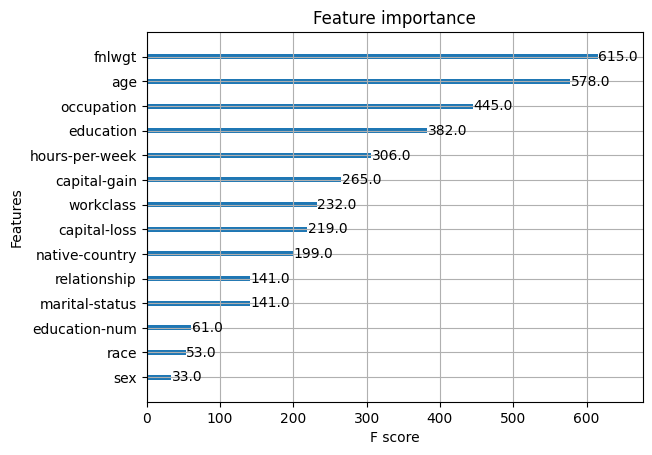

In [176]:
xgb.plot_importance(xgb_model)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

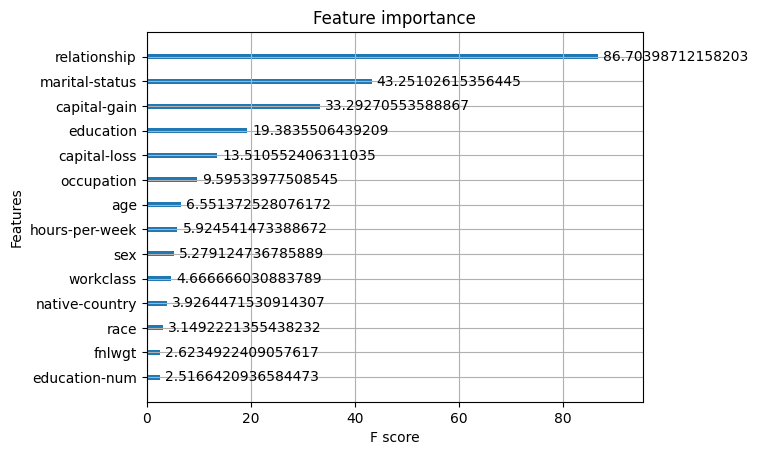

In [177]:
xgb.plot_importance(xgb_model,importance_type='gain')

## X-val

In [186]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

n_splits = 5

kfold = KFold(n_splits=n_splits, random_state=42, shuffle=True)
accuracy_scores = cross_val_score(xgb.XGBClassifier(enable_categorical=True), X_train, y_train, cv=kfold, scoring='accuracy')
accuracy_scores

array([0.86679463, 0.86935381, 0.8728087 , 0.87125672, 0.87074482])

In [187]:
cv_scores, oof_predictions = cat.cross_validate(
    cv=n_splits, train=train, metric="accuracy", return_oof=True, reset_datamodule=False
)
cv_scores, oof_predictions

2025-03-18 21:40:20,812 - {pytorch_tabular.tabular_model:2214} - INFO - Running Fold 1/5

2025-03-18 21:40:20,819 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-18 21:40:20,864 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:40:21,006 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-18 21:40:21,046 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-18 21:40:21,078 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 18.8 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.4 K │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 20.3 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 20.3 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 24                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2025-03-18 21:42:21,004 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-18 21:42:21,006 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:42:22,571 - {pytorch_tabular.tabular_model:2246} - INFO - Fold 1/5 score: 0.8519513607025146

2025-03-18 21:42:22,574 - {pytorch_tabular.tabular_model:2214} - INFO - Running Fold 2/5

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:42:22,645 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-18 21:42:22,684 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 18.8 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.4 K │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 20.3 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 20.3 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 24                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2025-03-18 21:43:47,957 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-18 21:43:47,960 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

Output()

2025-03-18 21:43:50,473 - {pytorch_tabular.tabular_model:2246} - INFO - Fold 2/5 score: 0.8579654693603516

2025-03-18 21:43:50,475 - {pytorch_tabular.tabular_model:2214} - INFO - Running Fold 3/5

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:43:50,529 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-18 21:43:50,578 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 18.8 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.4 K │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 20.3 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 20.3 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 24                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2025-03-18 21:45:12,526 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-18 21:45:12,529 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

Output()

2025-03-18 21:45:14,815 - {pytorch_tabular.tabular_model:2246} - INFO - Fold 3/5 score: 0.8573256731033325

2025-03-18 21:45:14,818 - {pytorch_tabular.tabular_model:2214} - INFO - Running Fold 4/5

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:45:14,883 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-18 21:45:14,915 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 18.8 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.4 K │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 20.3 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 20.3 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 24                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


2025-03-18 21:47:40,765 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-18 21:47:40,767 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:47:42,446 - {pytorch_tabular.tabular_model:2246} - INFO - Fold 4/5 score: 0.855515718460083

2025-03-18 21:47:42,453 - {pytorch_tabular.tabular_model:2214} - INFO - Running Fold 5/5

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:47:42,530 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-18 21:47:42,564 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/xing/school/cs178/cs178-project/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 18.8 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.4 K │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 20.3 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 20.3 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 24                                                                                          
Modules in eval mode: 0

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.

2025-03-18 21:49:31,600 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-18 21:49:31,602 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=

Output()

/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/home/xing/miniconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

2025-03-18 21:49:33,482 - {pytorch_tabular.tabular_model:2246} - INFO - Fold 5/5 score: 0.8621704578399658

([0.8519513607025146,
  0.8579654693603516,
  0.8573256731033325,
  0.855515718460083,
  0.8621704578399658],
 [       income_0_probability  income_1_probability  income_prediction
  37193              0.851293              0.148707                  0
  31093              0.147958              0.852042                  1
  33814              0.885505              0.114495                  0
  14500              0.990509              0.009491                  0
  23399              0.828203              0.171797                  0
  ...                     ...                   ...                ...
  46614              0.686658              0.313342                  0
  29457              0.999737              0.000263                  0
  24771              0.997096              0.002904                  0
  38896              0.695617              0.304383                  0
  3701               0.965938              0.034062                  0
  
  [7815 rows x 3 columns],
        